# Classificação Hierárquica



### Contextualização e tema

O conjunto de dados que será analisado possui multirótulos para seus exemplos e cada um desses rótulos, pode ter mais de 2 valores, ou seja, as classes não são binárias. Logo, este conjunto de dados tem mais de uma coluna alvo, tendo portanto multi-saídas.

Após a contextualização de como é o formato do dataset, pode-se explicar quais são as informações que o conjunto tem.


Segundo o SBH em 2005, o Brasil abriga a maior riqueza de Anuros do planeta, com 747 espécies, só no estado de São Paulo, mais de 180 espécies de Anuros estão registradas. 
Anuros são caracterizados por terem cauda ausente e pernas curtas, adaptadas para saltar e nadar. Eles são animais geralmente terrestres, mas alguns grupos vivem em ambientes aquáticos.

O dataset que será analisado é derivado das gravações realizadas sobre o "cantar" de vários anfíbios da ordem dos Anuros. Para se obter uma boa especificação de qual animal é o responsável pelo ruído, é armazenado no conjunto a sua *Família, Gênero e Espécie* (3 atributos classe). Dito isso, cada exemplo de entrada é derivado de um Anuro específico. Logo, o objetivo deste trabalho é tentar descobrir pelo ruído que o animal produz, qual sua *Família, Gênero e Espécie*. É importante salientar que o conjunto de dados disponibilizado para uso não está em formato de aúdio, pois após a captura dos áudios os pesquisadores extraíram informações que são transformadas em atributos numéricos. 

Os anfíbios da ordem *Anura* que destacam-se são: sapos, rãs e pererecas, um exemplo deste animal pode ser visualizado abaixo

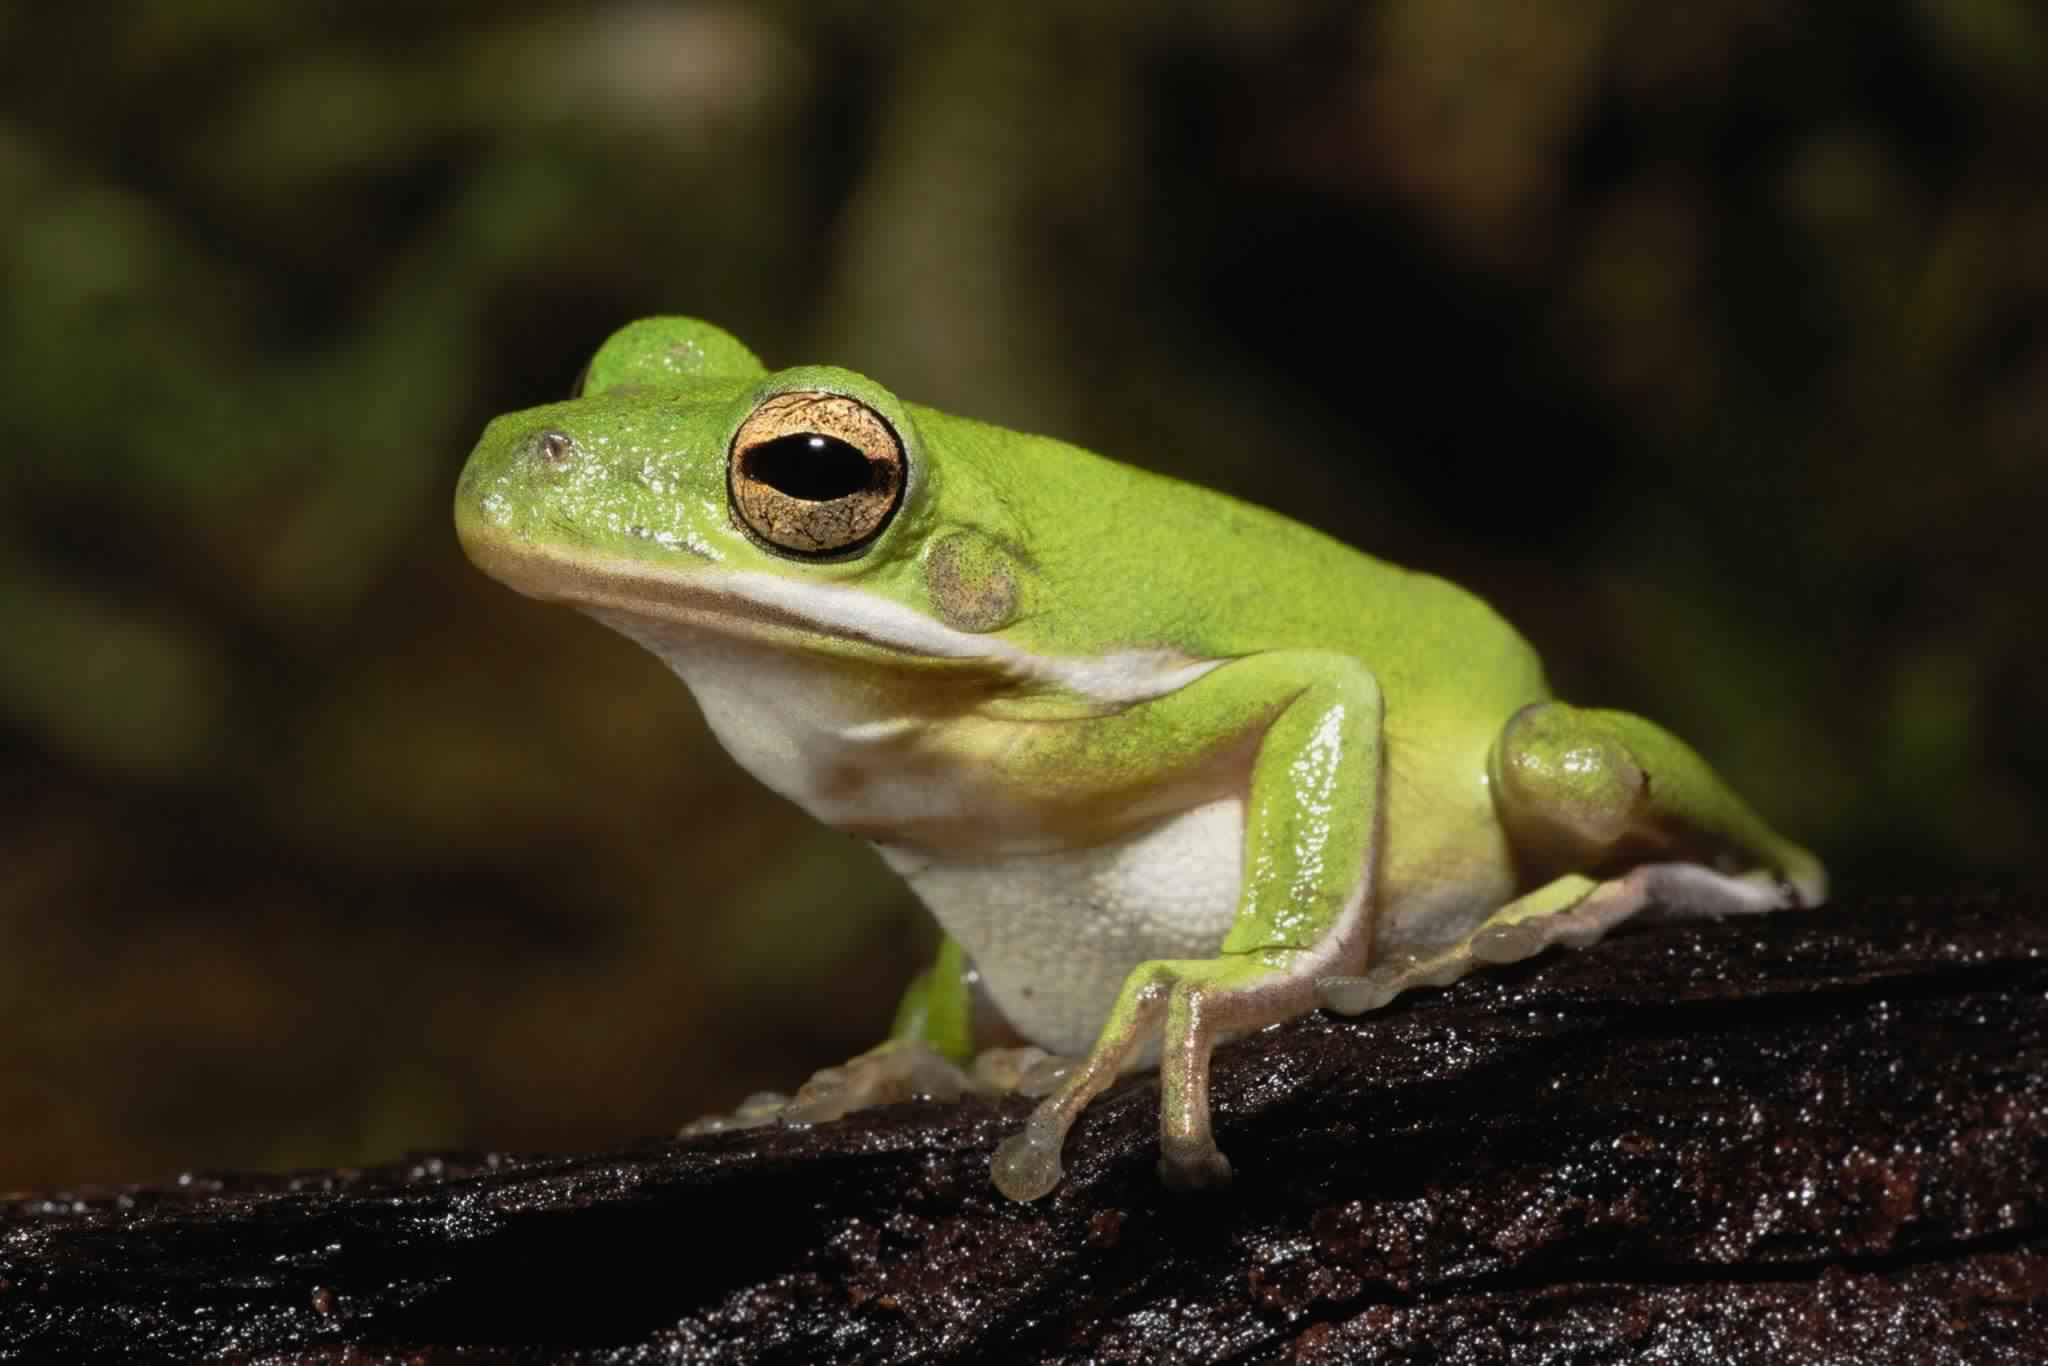

O cantar de um anuro pode ser visto no vídeo a seguir: https://www.youtube.com/watch?v=CDWFu6k3Fyc

## Instalando pacotes necessários

 https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29# -> Dataset

- Instalando uma versão compátivel do scikit-learn

In [1]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- Instalando o skmultilearn

In [2]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.4 MB/s eta 0:00:00


## Carregando o dataset

In [3]:
#Importando o conjunto de dados
import pandas as pd

df = pd.read_csv("Frogs_MFCCs.csv") 
df 

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


## Informações sobre o dataset

O formato do dataset pode ser visualizado abaixo

In [4]:
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


- Como podemos ver, os conjunto de dados tem 7195 exemplos com 26 atributos, sendo 3 deles as possíveis classes do exemplo
- Deve-se atentar que como se trata de um problema de multirrótulo, é possível que um exemplo pertença a mais de uma classe


In [5]:
df.shape

(7195, 26)

- Sem dados faltantes

In [6]:
nulos = df.isnull().sum()
flag = 0
for i in range(df.shape[1]):
  if nulos[i] != 0:
    print(f"Atributo {i} tem valor faltante")
    flag = 1
if flag == 0:
  print("Nenhum valor faltante")

Nenhum valor faltante


- Tipos de atributo presentes no conjunto

In [7]:
tipos = {}
t = df.dtypes
for i in range(df.shape[1]):
  if str(t[i]) not in tipos.keys():
    tipos[str(t[i])] = 1
  else:
    tipos[str(t[i])] += 1

for j in tipos.keys():
  print(f"O tipo {str(j)} tem {tipos[j]} valores")

O tipo float64 tem 22 valores
O tipo object tem 3 valores
O tipo int64 tem 1 valores


- Como a lista de atributos é muito extensa não é possível verificar todos os atributos manualmente
- Tendo em vista que caso haja string esta precisa ser transformada em float/int pode-se visualizar as strings do conjunto de dados
- Abaixo serão exibidos os tipos de dados que não são float

In [8]:
### Exibindo os possíveis valores de cada coluna
import numpy as np
colunas = df.columns
nro = 0
for i in colunas:
    if not isinstance(df[i].iloc[0],np.float64):
      print(i)
      nro += 1
print(f"{nro} atributos são strings/int")
        
            
        

Family
Genus
Species
RecordID
4 atributos são strings/int


- Tipos dos valores que não são float

In [9]:
df[["Family","Genus","Species","RecordID"]].dtypes

Family      object
Genus       object
Species     object
RecordID     int64
dtype: object

- Como RecordID é um ID do exemplo em questão, este deve ser removido

In [10]:
df.drop(['RecordID'],axis=1,inplace=True)

In [11]:
df.columns

Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus',
       'Species'],
      dtype='object')

### Colunas dataset


* **MFCCs_**: 
Cepstrum de Frequência Mel é uma representação do espectro de potência de curto prazo de um som, com base em uma transformada de cosseno linear de um espectro de potência logarítmica em uma escala de frequência mel não linear. Cada atributo deste tipo possui informações sobre um momento de captura do ruído do animal.

* Family: A Família do animal
* Genus: O Genêro do animal
* Species: A Espécie do animal





### Análise dos atributos preditivos

- A seguir serão exibidas informações sobre os atributos preditivos do dataset
- Para cada atributo, será exibido o seu valor máximo, mínimo, a média do atributo e o seu desvio padrão
- Além disso, para cada atributo um gráfico é exibido contendo a distribuição dos valores do atributo em questão

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,3)
def show_att(df,name):
    df[name].plot(kind='kde')
    plt.show()

A coluna MFCCs_ 1 tem as seguintes características:
MAX: 1.0
MIN: -0.251179153694868
STD: 0.06901555117253373
MEAN: 0.9898845472292859



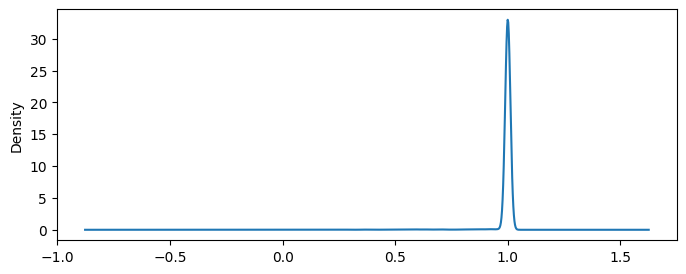

A coluna MFCCs_ 2 tem as seguintes características:
MAX: 1.0
MIN: -0.673025383989239
STD: 0.21865328573079237
MEAN: 0.323583775405742



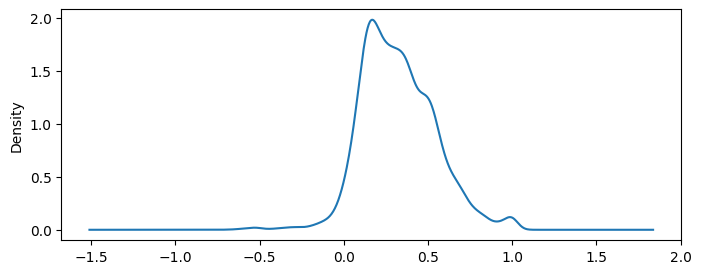

A coluna MFCCs_ 3 tem as seguintes características:
MAX: 1.0
MIN: -0.436027557631229
STD: 0.2635272323328792
MEAN: 0.311224209495982



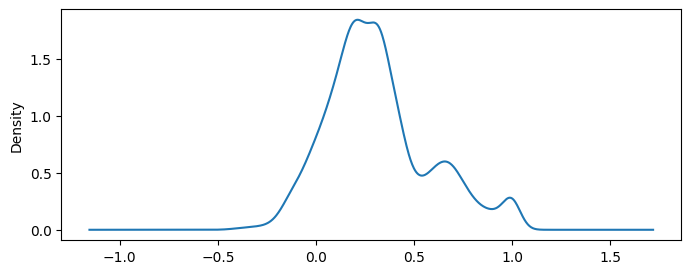

A coluna MFCCs_ 4 tem as seguintes características:
MAX: 1.0
MIN: -0.472676234325039
STD: 0.16032757094849429
MEAN: 0.44599713140004466



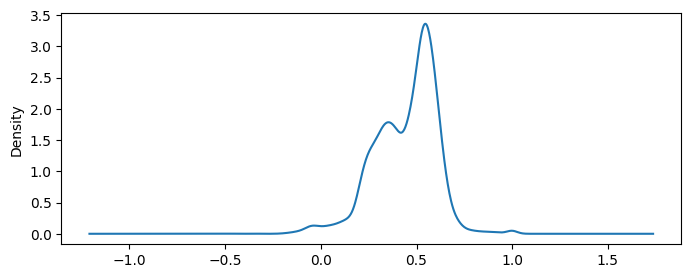

A coluna MFCCs_ 5 tem as seguintes características:
MAX: 0.752246414457802
MIN: -0.636012475323151
STD: 0.1627223727159728
MEAN: 0.12704625097734232



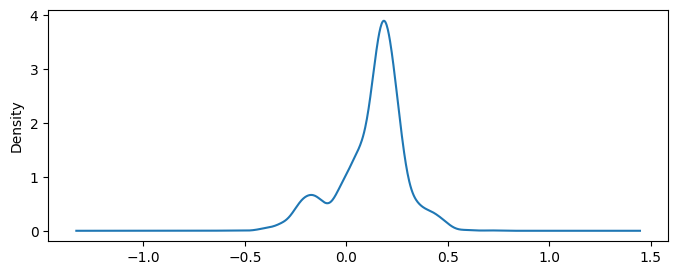

A coluna MFCCs_ 6 tem as seguintes características:
MAX: 0.96423986349077
MIN: -0.410416976545143
STD: 0.12041180624102446
MEAN: 0.0979389926300727



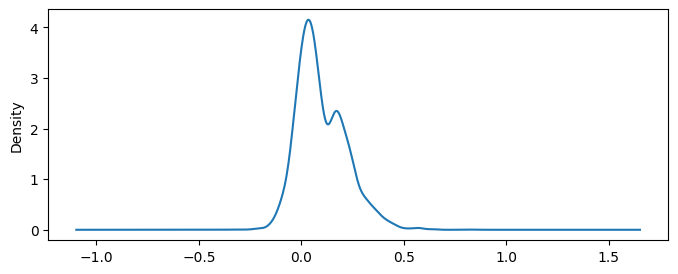

A coluna MFCCs_ 7 tem as seguintes características:
MAX: 1.0
MIN: -0.538981700470428
STD: 0.17140402642087002
MEAN: -0.001396800268699489



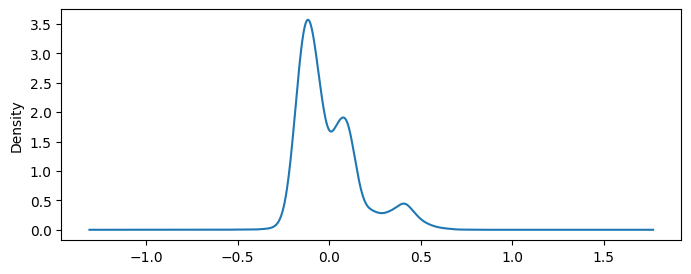

A coluna MFCCs_ 8 tem as seguintes características:
MAX: 0.551762446319163
MIN: -0.576506174491891
STD: 0.11630213089683955
MEAN: -0.00037011247002753666



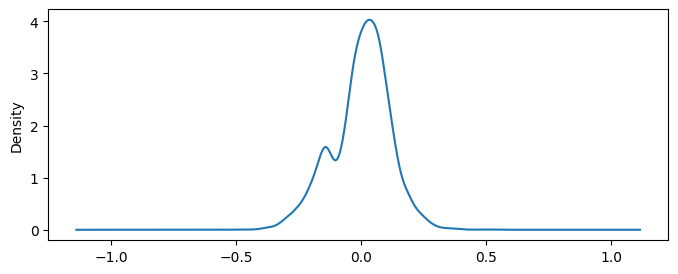

A coluna MFCCs_ 9 tem as seguintes características:
MAX: 0.738033099583871
MIN: -0.58731343775337
STD: 0.1790084635459865
MEAN: 0.12821336604452852



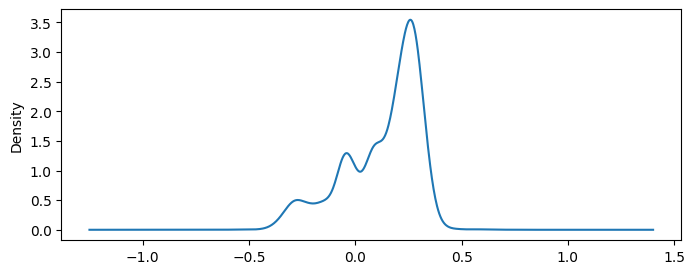

A coluna MFCCs_10 tem as seguintes características:
MAX: 0.52276766264947
MIN: -0.952265655557829
STD: 0.127099416720641
MEAN: 0.05599796629222882



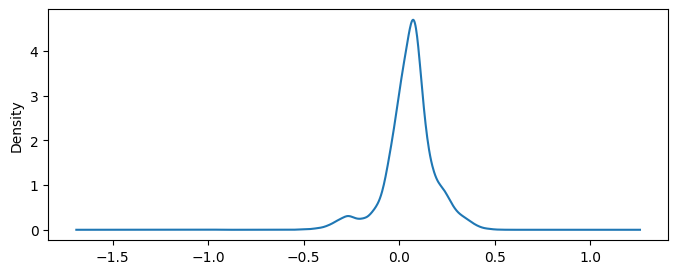

A coluna MFCCs_11 tem as seguintes características:
MAX: 0.523032830793899
MIN: -0.901988854570569
STD: 0.1867919258170543
MEAN: -0.11568238282854561



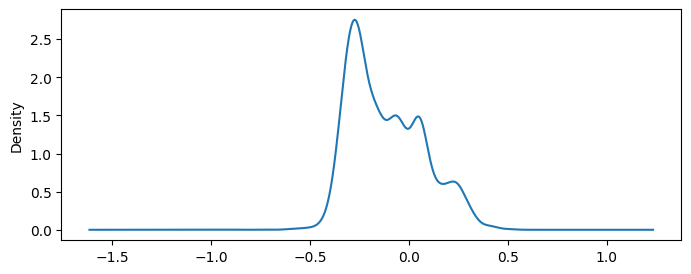

A coluna MFCCs_12 tem as seguintes características:
MAX: 0.690888875000885
MIN: -0.799441302280563
STD: 0.15598309901463045
MEAN: 0.0433712521247071



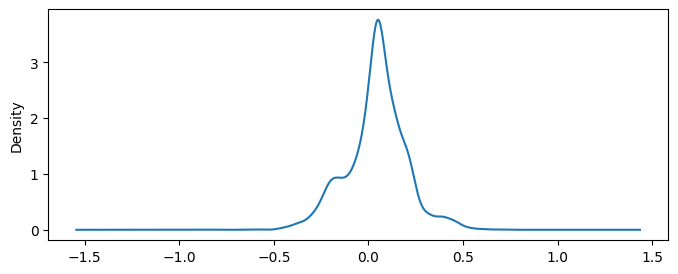

A coluna MFCCs_13 tem as seguintes características:
MAX: 0.945709943123683
MIN: -0.644115927164735
STD: 0.20687978826300088
MEAN: 0.15094474944053152



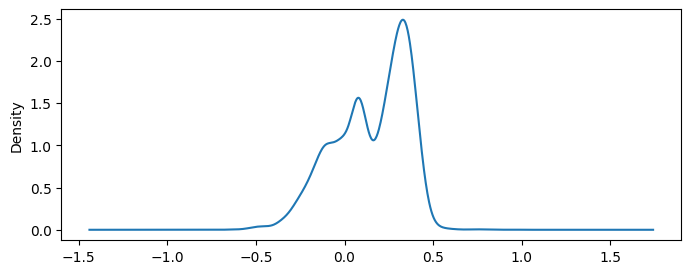

A coluna MFCCs_14 tem as seguintes características:
MAX: 0.575748961119413
MIN: -0.590380219762154
STD: 0.1525145468552136
MEAN: -0.03924361423852134



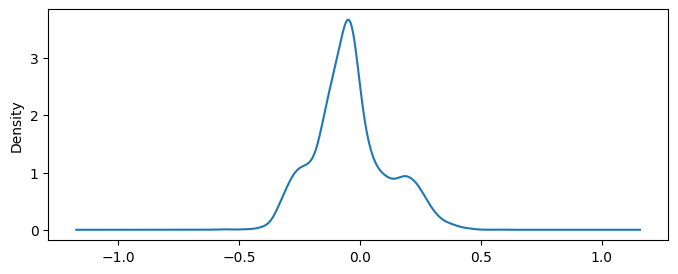

A coluna MFCCs_15 tem as seguintes características:
MAX: 0.668924197741108
MIN: -0.717155589773686
STD: 0.18761807942250774
MEAN: -0.10174770063183439



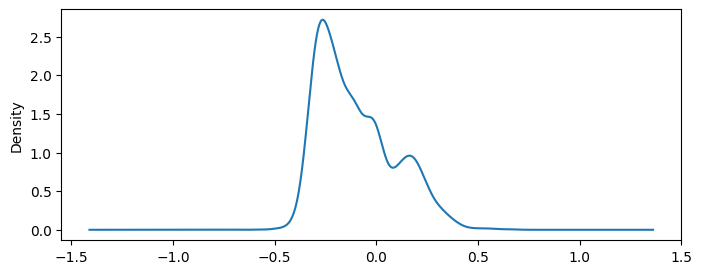

A coluna MFCCs_16 tem as seguintes características:
MAX: 0.670700003490928
MIN: -0.498675403830133
STD: 0.11991533511175233
MEAN: 0.04206186352740123



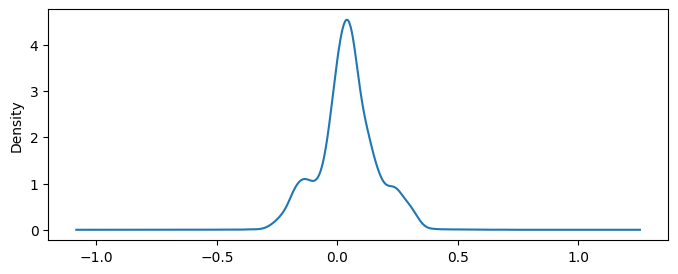

A coluna MFCCs_17 tem as seguintes características:
MAX: 0.681157095938629
MIN: -0.421479728327128
STD: 0.13805527448456995
MEAN: 0.08868030564290083



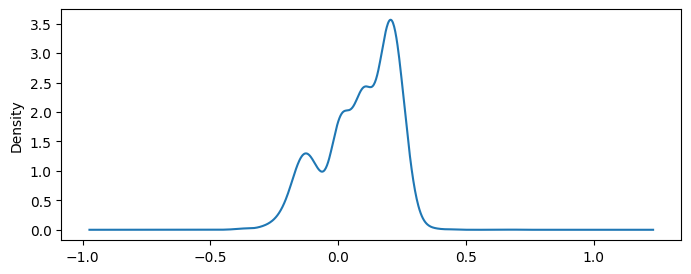

A coluna MFCCs_18 tem as seguintes características:
MAX: 0.614064394882577
MIN: -0.759321553990284
STD: 0.08473306679027912
MEAN: 0.007755206913111662



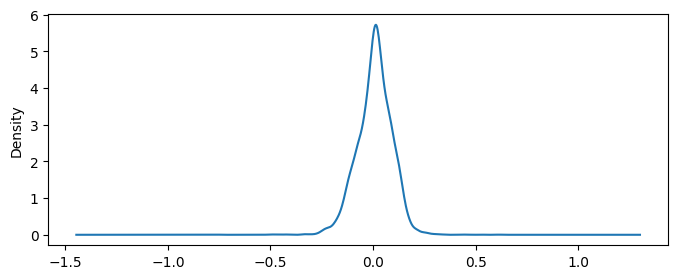

A coluna MFCCs_19 tem as seguintes características:
MAX: 0.574208973965989
MIN: -0.680745390359785
STD: 0.08254553525920495
MEAN: -0.04947389490281982



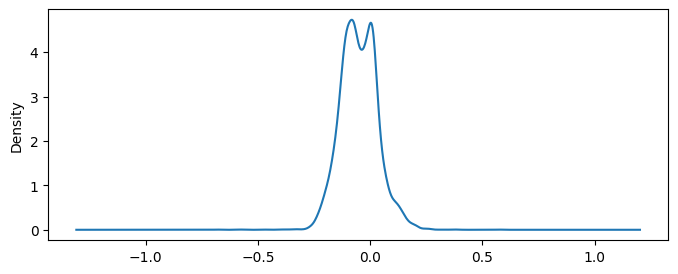

A coluna MFCCs_20 tem as seguintes características:
MAX: 0.467830629337538
MIN: -0.361648778290323
STD: 0.09418050715485018
MEAN: -0.053244050256477174



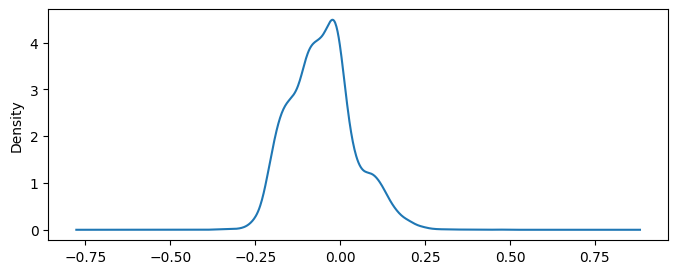

A coluna MFCCs_21 tem as seguintes características:
MAX: 0.38979677275583
MIN: -0.430811776008093
STD: 0.07946986176889895
MEAN: 0.037313464073989194



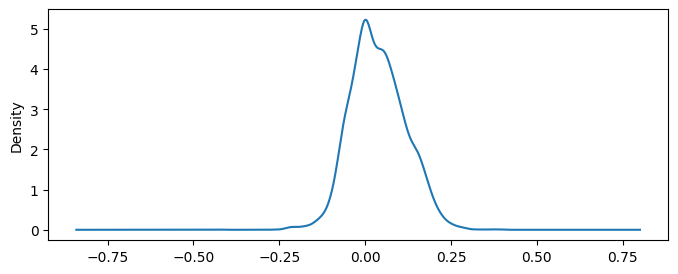

A coluna MFCCs_22 tem as seguintes características:
MAX: 0.432206844444825
MIN: -0.379304321533521
STD: 0.12344183814493362
MEAN: 0.08756749401291006



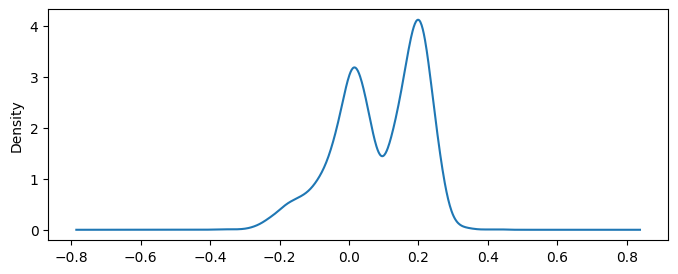

In [13]:
colunas = df.columns[:-3]

for i in colunas:
    
    max_ = df[i].max()
    min_ = df[i].min()
    std_ = df[i].std()
    mean_ = df[i].mean()
    
    print(f"A coluna {i} tem as seguintes características:")
    print(f"MAX: {max_}\nMIN: {min_}\nSTD: {std_}\nMEAN: {mean_}\n")
    show_att(df,i)

- Como pode ser visualizado os dados pertencentes aos atributos preditivos não precisam de normalização, já que não há muita discrêpancia entre os valores dos atributos
- Isto acontece pois o dataset já foi previamente normalizado pelos pesquisadores para padronizar os atributos
- Isso explica a distribuição dos valores de cada atributo

### Análise dos atributos alvo

- Abaixo, podemos observar a distribuição dos atributos alvo e como cada atributo está disposto no conjunto de dados

In [14]:
import seaborn as sns

In [15]:
def plot_count(name,df,title):
  plt.figure(figsize=(25, 8))
  plt.title(title)
  fig = sns.countplot(x=name,data=df)
  plt.show()

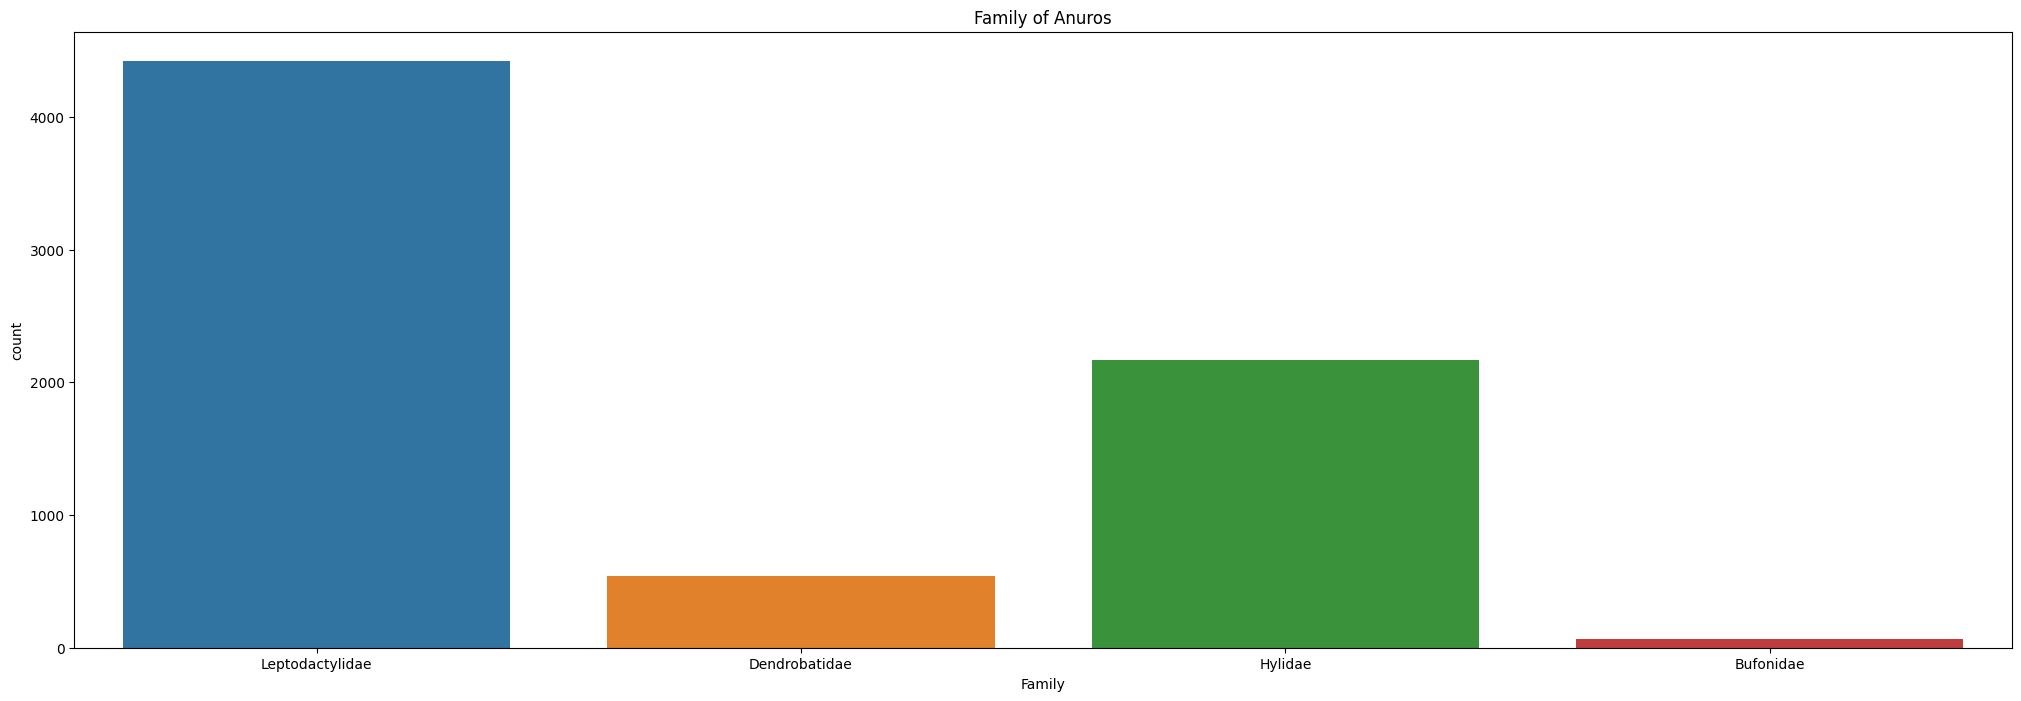

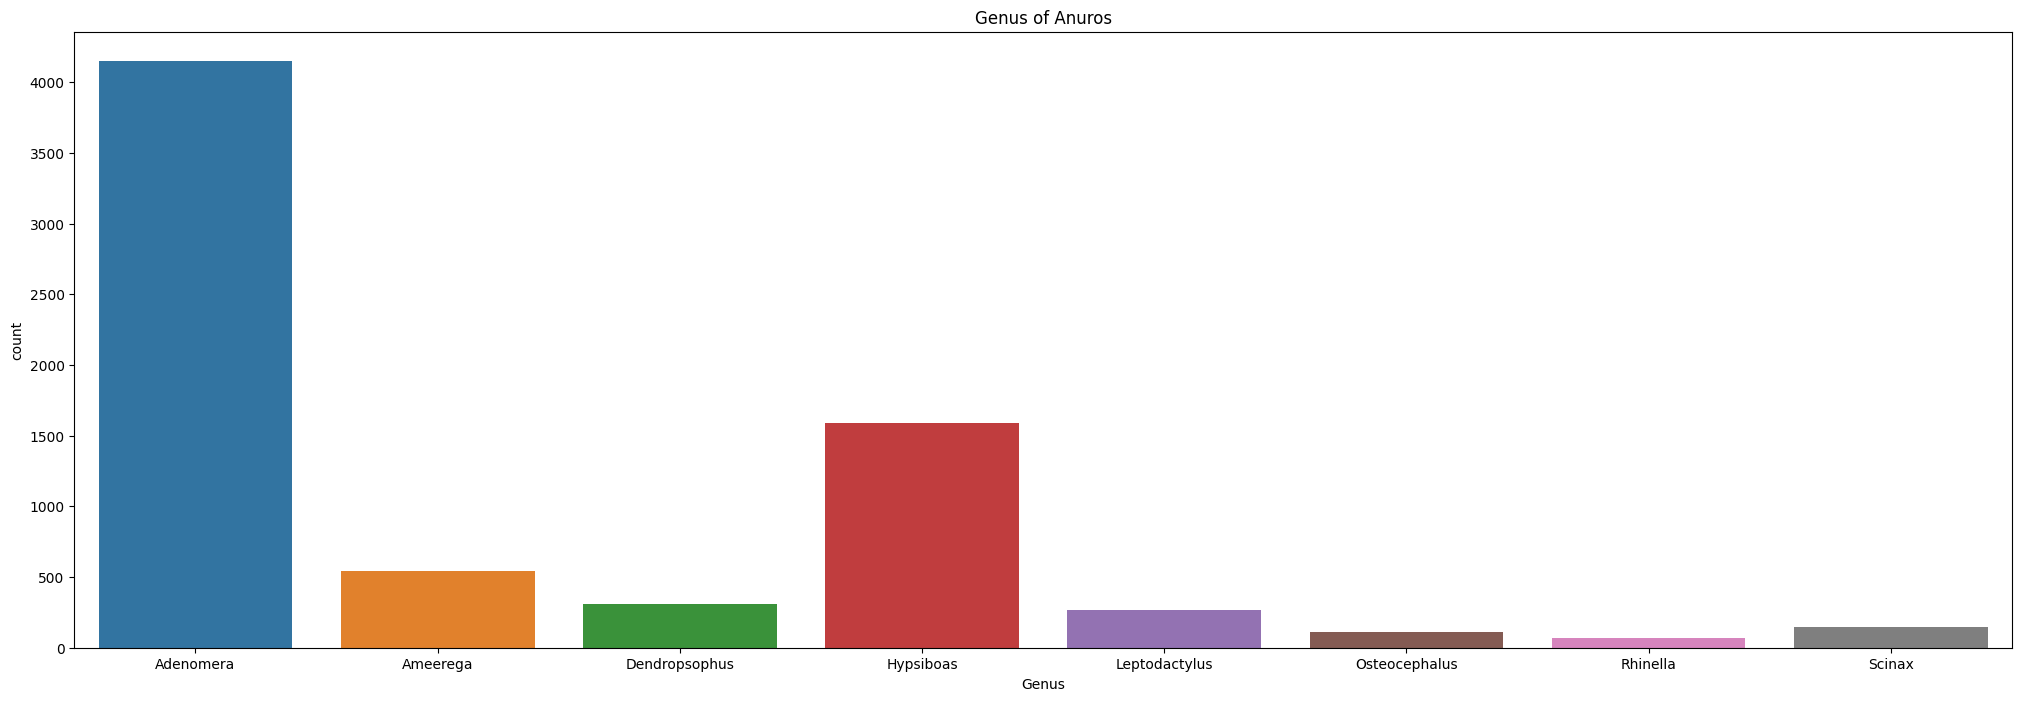

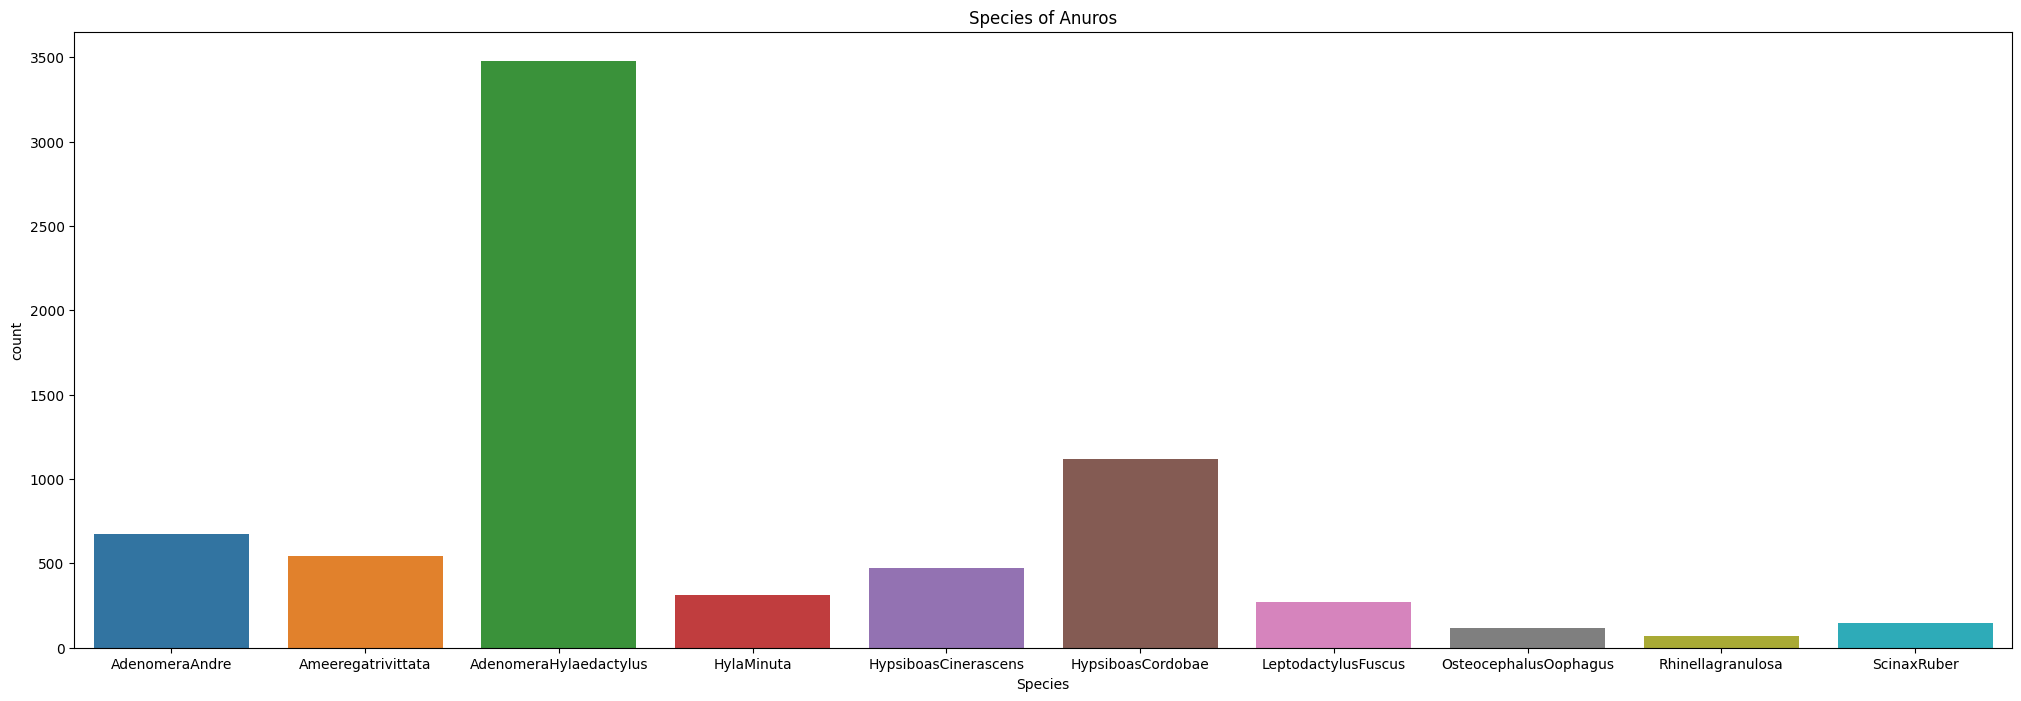

In [16]:
alvos = ['Family','Genus','Species']
for i in alvos:
  plot_count(i,df,i+' of Anuros')

### Pré-processamento

- Inicialmente o conjunto de teste e de treino já será dividido. Isto será feito para que as modificações que serão realizadas nos atributos alvo não afetem os atributos preditivos

In [17]:
df_ohe = df.copy()

Como dito anteriormente os atributos preditivos já foram normalizados e não possuem valores faltantes, assim, não há necessidade de pré-processá-los visto que estes já se encontram processados.

Entretanto, os atributos alvo precisam ser pré-processados. Isso acontece pois em uma das técnicas que será aplicada é necessário que os atributos estejam desta forma para que o algoritmo de classificação funcione corretamente, então será necessário transformar os atributos classe em atributos binários. Para isto, será realizado a técnica de One-Hot-Encoding. Assim, o resultado será que o o número total de atributos alvo, será o número total de valores espécificos de cada classe.

Ou seja, para o atributo **"Family"** após o processo de One-Hot-Encoding, serão criados 4 novos atributos, representando cada um dos possíveis valores deste atributo

- Abaixo serão exibidos os possíveis valores para as classes

In [18]:
### Exibindo os possíveis valores de cada coluna
import numpy as np
colunas = df_ohe.columns[-3:]
prev_vals = []
new_vals = []
attributes = []
for i in colunas:
    if not isinstance(df_ohe[i].iloc[0],np.float64):
        vals = df_ohe[i].unique()
        print(f"{i} : {df_ohe[i].unique()}\n")
        d = {i:vals}
        new_vals.append(d)
        
        
  

Family : ['Leptodactylidae' 'Dendrobatidae' 'Hylidae' 'Bufonidae']

Genus : ['Adenomera' 'Ameerega' 'Dendropsophus' 'Hypsiboas' 'Leptodactylus'
 'Osteocephalus' 'Rhinella' 'Scinax']

Species : ['AdenomeraAndre' 'Ameeregatrivittata' 'AdenomeraHylaedactylus'
 'HylaMinuta' 'HypsiboasCinerascens' 'HypsiboasCordobae'
 'LeptodactylusFuscus' 'OsteocephalusOophagus' 'Rhinellagranulosa'
 'ScinaxRuber']



In [19]:
#Ordena em ordem alfabética os valores, para realizar corretamente o processo de One-Hot-Encoding
new_vals[0]['Family'].sort()
new_vals[1]['Genus'].sort()
new_vals[2]['Species'].sort()

In [20]:
#Exibe os valores ordenados
print(new_vals[0]['Family'])
print(new_vals[1]['Genus'])
print(new_vals[2]['Species'])

['Bufonidae' 'Dendrobatidae' 'Hylidae' 'Leptodactylidae']
['Adenomera' 'Ameerega' 'Dendropsophus' 'Hypsiboas' 'Leptodactylus'
 'Osteocephalus' 'Rhinella' 'Scinax']
['AdenomeraAndre' 'AdenomeraHylaedactylus' 'Ameeregatrivittata'
 'HylaMinuta' 'HypsiboasCinerascens' 'HypsiboasCordobae'
 'LeptodactylusFuscus' 'OsteocephalusOophagus' 'Rhinellagranulosa'
 'ScinaxRuber']


In [21]:
#Une as listas
lista = np.concatenate((new_vals[0]['Family'],new_vals[1]['Genus'],new_vals[2]['Species']))

- O número total de atributos alvo será 22

In [22]:
len(lista)

22

- Transforma os atributos alvo em atributos alvo binários com a técninca do OneHotEncoder

In [23]:
def transform_onehot(df,lista):
    from sklearn.preprocessing import OneHotEncoder

    ohe = OneHotEncoder()

    t = ohe.fit_transform(df)

    return pd.DataFrame(t.toarray(),columns=lista)
    

In [24]:
#Transforma os dados de treino
labels = transform_onehot(df_ohe.iloc[:,-3:],lista)

Abaixo, pode-se verificar os atributos alvo após o processo de One-Hot-Encoding

In [25]:
labels.head(10)

,Bufonidae,Dendrobatidae,Hylidae,Leptodactylidae,Adenomera,Ameerega,Dendropsophus,Hypsiboas,Leptodactylus,Osteocephalus,...,AdenomeraAndre,AdenomeraHylaedactylus,Ameeregatrivittata,HylaMinuta,HypsiboasCinerascens,HypsiboasCordobae,LeptodactylusFuscus,OsteocephalusOophagus,Rhinellagranulosa,ScinaxRuber
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Remove os labels do dataset

In [26]:
df_ohe.drop(['Family','Species','Genus'],axis=1,inplace=True)

- Verifica-se o tamanho dos dados de entrada e os labels

In [27]:
print(df_ohe.shape)
print(labels.shape)

(7195, 22)
(7195, 22)


## Classificação

- Na classificação hierárquica é possível trabalhar com o problema de algumas formas. Neste trabalho será entendido três delas: Classificação Plana, Abordagem Global e Abordagem Local

- Cada tipo de abordagem influencia no resultado de uma maneira
- Estas abordagens podem ser melhor compreendidas em <a name="cell-id"></a>[1]



[1] CN Silla et al., "A survey of hierarchical classification across
           different application domains", 2011.

### Avaliação

- Para avaliar os modelos construídos algumas técnicas de avaliação serão utilizadas

Para a Classificação Plana serão calculados a: Perda de Hamming, Acurácia, Recall e F1-Score. Abaixo, pode-se visualizar como calcular cada uma dessas métricas

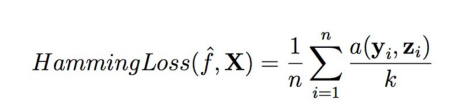

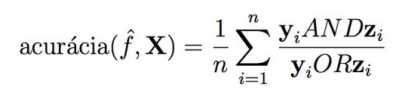

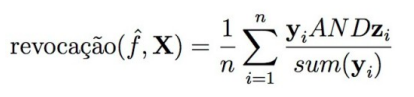

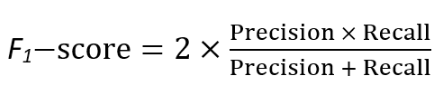

Já para a classificação hierárquica utilizando a abordagem global/local, serão calculados o recall, precision e o f1-score. Abaixo, pode-se visualizar como calcular cada uma dessas métricas

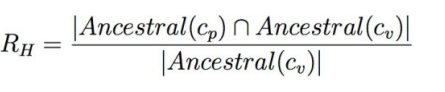

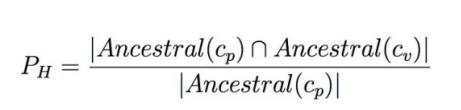

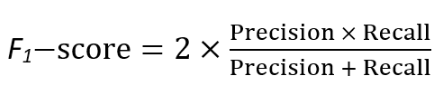

### Classificação Plana

- Esta abordagem consiste em ignorar a hierarquia entre as classes e tratar o problema como um problema multirrótulo. Assim, o classificador só prevê a classe nos nós folhas. Esta abordagem não se importa com hierarquia, e dessa maneira é uma solução indireta para este problema

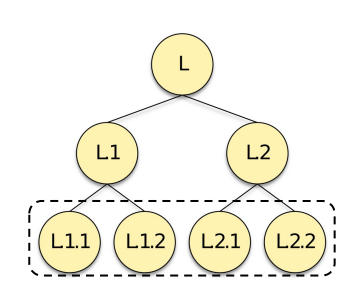

Fonte: https://ava2.ead.ufscar.br/pluginfile.php/867753/mod_resource/content/1/Aula_03_Classificacao_hierarquica.pdf

- Logo, nesse caso que está sendo estudado, a hierarquia entre as classes será ignorada e diversos classificadores serão aplicados ao conjunto de dados

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_ohe, labels, test_size=0.4, random_state=42)

##### Binary Relevance

In [29]:
# Usando Binary Relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

n_estimators = [10,20,30,40,50,60,70]

for i in n_estimators:
  br = BinaryRelevance(RandomForestClassifier(n_estimators=i))

  br.fit(X_train.values, y_train.values)

  pred = br.predict(X_test.values)

  print(f"N_estimators = {i}")
  print('Hamming loss: {}'.format(metrics.hamming_loss(y_test, pred)))
  print('Acurácia: {}'.format(metrics.accuracy_score(y_test, pred)))
  print('Recall: {}'.format(metrics.recall_score(y_test, pred,average='weighted')))
  print('F1-score: {}'.format(metrics.f1_score(y_test, pred, average='weighted')))
  print('\n')

N_estimators = 10
Hamming loss: 0.008133805041379746
Acurácia: 0.9183460736622655
Recall: 0.9523974982626824
F1-score: 0.9682536891852506


N_estimators = 20
Hamming loss: 0.007596815970686714
Acurácia: 0.9305072967338429
Recall: 0.9558721334259903
F1-score: 0.9704190522740443


N_estimators = 30
Hamming loss: 0.006664981995072336
Acurácia: 0.9395413481584434
Recall: 0.9617790132036136
F1-score: 0.9742894210130021


N_estimators = 40
Hamming loss: 0.006633394402678628
Acurácia: 0.9426685198054204
Recall: 0.9616631920315034
F1-score: 0.9743270017997206


N_estimators = 50
Hamming loss: 0.006459662644513235
Acurácia: 0.9440583738707435
Recall: 0.9627055825804958
F1-score: 0.9749863008501659


N_estimators = 60
Hamming loss: 0.00660180681028492
Acurácia: 0.9430159833217512
Recall: 0.9630530460968265
F1-score: 0.9745470927354399


N_estimators = 70
Hamming loss: 0.006475456440710089
Acurácia: 0.9447533009034051
Recall: 0.9635163307852675
F1-score: 0.9749870925034019




##### Label PowerSet

In [30]:
# Usando Label Powerset
from skmultilearn.problem_transform import LabelPowerset

estimators = [10,20,30,40,50,60,70]
for i in estimators:
  lp = LabelPowerset(RandomForestClassifier(n_estimators=i))

  lp.fit(X_train, y_train)

  pred = lp.predict(X_test)



  print(f"N_estimators = {i}")
  print('Hamming loss: {}'.format(metrics.hamming_loss(y_test, pred)))
  print('Acurácia: {}'.format(metrics.accuracy_score(y_test, pred)))
  print('Recall: {}'.format(metrics.recall_score(y_test, pred,average='weighted')))
  print('F1-score: {}'.format(metrics.f1_score(y_test, pred, average='weighted')))
  print('\n')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


N_estimators = 10
Hamming loss: 0.006507044033103797
Acurácia: 0.972550382209868
Recall: 0.9761408385452861
F1-score: 0.9759755042018099




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


N_estimators = 20
Hamming loss: 0.006096405331985596
Acurácia: 0.9753300903405142
Recall: 0.9776465137827195
F1-score: 0.9775355215373505




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


N_estimators = 30
Hamming loss: 0.006222755701560427
Acurácia: 0.9753300903405142
Recall: 0.9771832290942785
F1-score: 0.9769898050466924




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


N_estimators = 40
Hamming loss: 0.005843704592835934
Acurácia: 0.9760250173731758
Recall: 0.9785730831596016
F1-score: 0.9783861427043352




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


N_estimators = 50
Hamming loss: 0.005938467370017057
Acurácia: 0.9756775538568451
Recall: 0.9782256196432708
F1-score: 0.9780898032844085




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


N_estimators = 60
Hamming loss: 0.005717354223261103
Acurácia: 0.9770674079221682
Recall: 0.9790363678480426
F1-score: 0.9789035857251945




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


N_estimators = 70
Hamming loss: 0.005464653484111441
Acurácia: 0.9774148714384989
Recall: 0.9799629372249247
F1-score: 0.9797972671945986




### Abordagem Global (ou Big-Bang)

- Esta abordagem gera um modelo único para toda a hierarquia

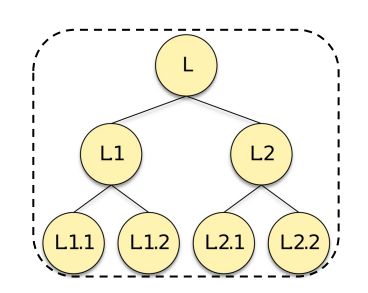

Fonte: https://ava2.ead.ufscar.br/pluginfile.php/867753/mod_resource/content/1/Aula_03_Classificacao_hierarquica.pdf

- Infelizmente não foi encontrado método que realizassem esta abordagem

### Abordagem  Local (ou Top-Down)

In [35]:
#bilioteca específica de classificação hierárquica
!pip install hiclass

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- Esta abordagem utiliza um classificador local para cada "parte" da hierarquia, e com isso é possível utilizar informações locais das classes com o intuito de melhorar o resultado. Como é uma abordagem Top-Down, o teste começa pelas classes mais genéricas e desce para as mais especializadas.

- Dentro dessa abordagem podemos utilizar 3 métodos diferentes: Classificador Local por Nó, Classificador Local por Nó Pai, Classificador Local por Nível

- Para utilizar as abordagens a seguir, é necessário que o atributo alvo esteja neste formato: [c1,c2,c3,...,cn]

- Logo é necessário atualizar o conjunto de dados

In [36]:
df_hier = df.copy()

In [37]:
labels = []
for i in range(df_hier.shape[0]):
  new_ex = []
  family = df_hier.loc[i,'Family']
  genre =  df_hier.loc[i,'Genus']
  especie = df_hier.loc[i,'Species']
  new_ex.append(family)
  new_ex.append(genre)
  new_ex.append(especie)
  labels.append(new_ex)

In [38]:
df_hier.drop(['Family','Genus','Species'],axis=1,inplace=True)

In [39]:
np.array(labels)

array([['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
       ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
       ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
       ...,
       ['Hylidae', 'Scinax', 'ScinaxRuber'],
       ['Hylidae', 'Scinax', 'ScinaxRuber'],
       ['Hylidae', 'Scinax', 'ScinaxRuber']], dtype='<U22')

In [40]:
labels =  np.array(labels)

In [41]:
labels

array([['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
       ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
       ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
       ...,
       ['Hylidae', 'Scinax', 'ScinaxRuber'],
       ['Hylidae', 'Scinax', 'ScinaxRuber'],
       ['Hylidae', 'Scinax', 'ScinaxRuber']], dtype='<U22')

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_hier, labels, test_size=0.4, random_state=42)

In [43]:
# Computando métrica de avaliação
def calc_metrics(y_test,predictions):
  import hiclass.metrics 

  f1_hierarchical = hiclass.metrics.f1(y_test, predictions)
  prec_hierarchical = hiclass.metrics.precision(y_test,predictions)
  rec_hierarchical = hiclass.metrics.recall(y_test,predictions)
  print(f"f-score: {f1_hierarchical:.5f}\n")
  print(f"Precision: {prec_hierarchical:.5f}\n")
  print(f"Recall: {rec_hierarchical:.5f}\n")

#### Classificador Local por Nó

- Esta abordagem consiste em treinar classificadores binários para cada nó da taxonomia. Ou seja, na imagem abaixo, terá um classificador para o Nó "Reptile" que irá classificar o exemplo entre "Reptil" e "Não Reptil".

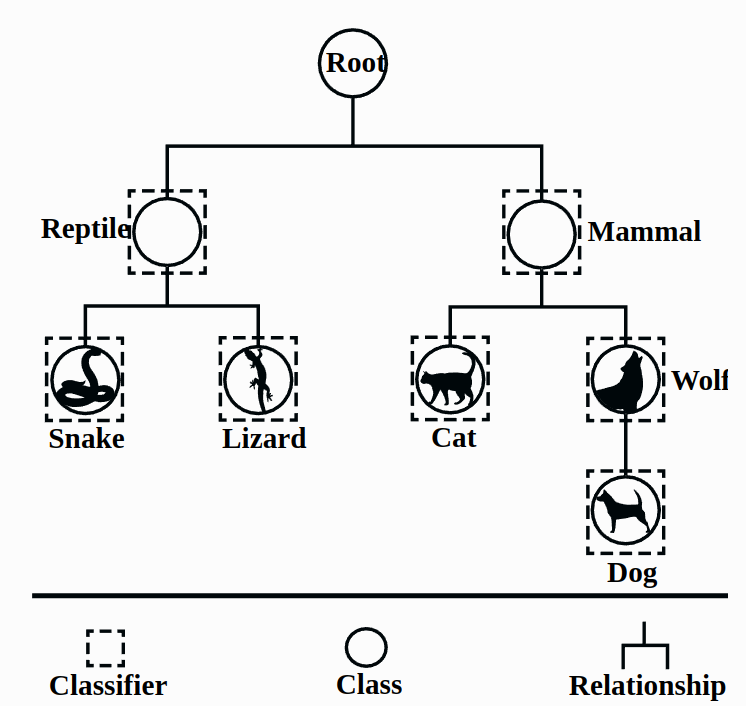

Fonte: https://hiclass.readthedocs.io/en/latest/algorithms/local_classifier_per_node.html

In [44]:
%%time
from hiclass import LocalClassifierPerNode


from sklearn.ensemble import RandomForestClassifier

estimators = [1,3,5,7,9,10]

for i in estimators:
  base_classifier = RandomForestClassifier(n_estimators=i)
  lcpn = LocalClassifierPerNode(
      local_classifier=base_classifier,
      verbose=0,
      n_jobs=1,
  )
  lcpn.fit(X_train, y_train)


  predictions = lcpn.predict(X_test)
  print(f"Nro Estimators: {i}")
  calc_metrics(y_test, predictions)
  print("------------------------------\n")





Nro Estimators: 1
f-score: 0.91904

Precision: 0.91904

Recall: 0.91904

------------------------------

Nro Estimators: 3
f-score: 0.96271

Precision: 0.96271

Recall: 0.96271

------------------------------

Nro Estimators: 5
f-score: 0.96838

Precision: 0.96838

Recall: 0.96838

------------------------------

Nro Estimators: 7
f-score: 0.97070

Precision: 0.97070

Recall: 0.97070

------------------------------

Nro Estimators: 9
f-score: 0.97394

Precision: 0.97394

Recall: 0.97394

------------------------------

Nro Estimators: 10
f-score: 0.97440

Precision: 0.97440

Recall: 0.97440

------------------------------

CPU times: user 8.02 s, sys: 123 ms, total: 8.14 s
Wall time: 9.97 s


#### Classificador Local por Nó Pai

- Esta abordagem consiste em treinar classificador multi-classe para cada nó pai existente na hierarquia. Ou seja, na imagem abaixo um classificador multi-classe irá classificar o exemplo, para exemplificiar, um exemplo pode ser "Reptile -> Snake", "Mammal->Wolf->Dog", etc...

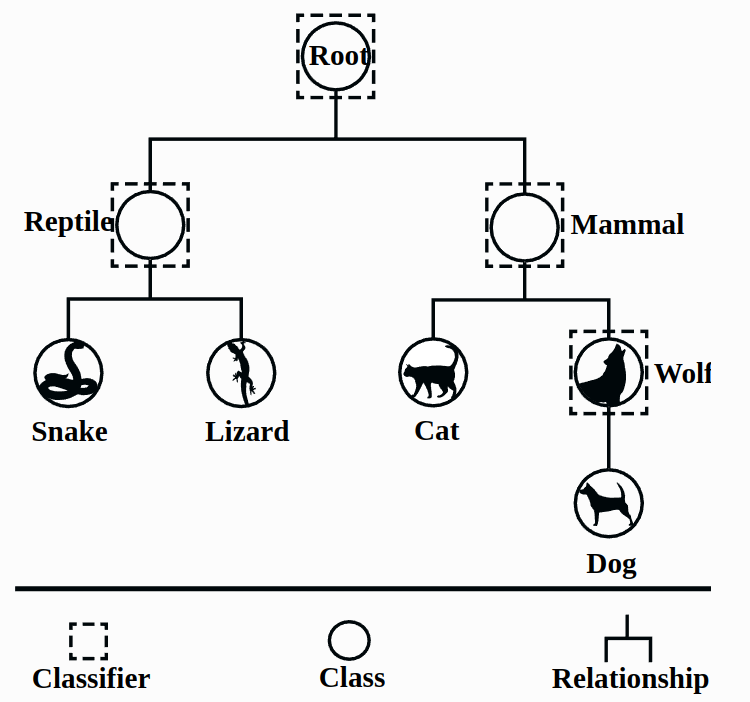

Fonte: https://hiclass.readthedocs.io/en/latest/algorithms/local_classifier_per_parent_node.html

In [45]:
%%time
from hiclass import LocalClassifierPerParentNode

from sklearn.ensemble import RandomForestClassifier
estimators = [1,3,5,7,9,10]

for i in estimators:
  base_classifier = RandomForestClassifier(n_estimators=i)


  lcppn = LocalClassifierPerParentNode(
      local_classifier=base_classifier, 
      verbose=0,
      n_jobs=1,
  )
  lcppn.fit(X_train, y_train)


  predictions = lcppn.predict(X_test)

  print(f"Nro Estimators: {i}")
  calc_metrics(y_test, predictions)
  print("------------------------------\n")

Nro Estimators: 1
f-score: 0.91452

Precision: 0.91452

Recall: 0.91452

------------------------------

Nro Estimators: 3
f-score: 0.95228

Precision: 0.95228

Recall: 0.95228

------------------------------

Nro Estimators: 5
f-score: 0.96097

Precision: 0.96097

Recall: 0.96097

------------------------------

Nro Estimators: 7
f-score: 0.96711

Precision: 0.96711

Recall: 0.96711

------------------------------

Nro Estimators: 9
f-score: 0.97220

Precision: 0.97220

Recall: 0.97220

------------------------------

Nro Estimators: 10
f-score: 0.96908

Precision: 0.96908

Recall: 0.96908

------------------------------

CPU times: user 4.04 s, sys: 50.9 ms, total: 4.09 s
Wall time: 4.29 s


#### Classificador Local por Nível

- Esta abordagem consiste  em treinar classificador multi-classe para cada nível da taxonomia. Ou seja, para a imagem abaixo um classificador multi-classe será aplicado para decidir se o exemplo é "Snake", "Lizard", "Cat" ou "Wolf".

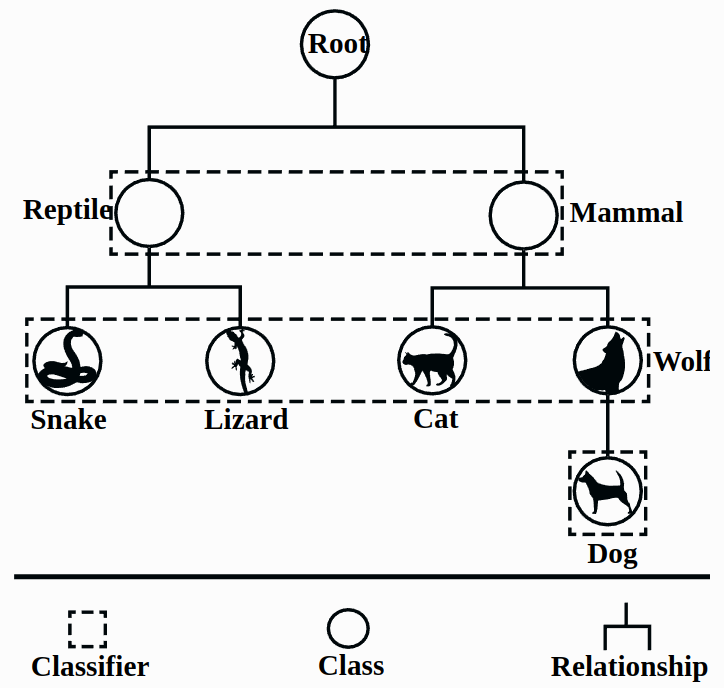

Fonte: https://hiclass.readthedocs.io/en/latest/algorithms/local_classifier_per_level.html

In [46]:
from sklearn.ensemble import RandomForestClassifier

base_classifier = RandomForestClassifier(n_estimators=50)

In [47]:
%%time
from hiclass import LocalClassifierPerLevel
from sklearn.ensemble import RandomForestClassifier

estimators = [1,3,5,7,9,10]
for i in estimators:
  base_classifier = RandomForestClassifier(n_estimators=i)
  ###Instaciamos a estratégia de Classificador local por nó pai.
  lcpl = LocalClassifierPerLevel(
      local_classifier=base_classifier, ##Indicamos quem é nosso classificador base.
      verbose=0,
      n_jobs=1,
  )
  lcpl.fit(X_train, y_train)

  ### Realizando predições

  predictions = lcpl.predict(X_test)

  print(f"Nro Estimators: {i}")
  calc_metrics(y_test, predictions)
  print("------------------------------\n")



Nro Estimators: 1
f-score: 0.92043

Precision: 0.92043

Recall: 0.92043

------------------------------

Nro Estimators: 3
f-score: 0.95529

Precision: 0.95529

Recall: 0.95529

------------------------------

Nro Estimators: 5
f-score: 0.96433

Precision: 0.96433

Recall: 0.96433

------------------------------

Nro Estimators: 7
f-score: 0.96653

Precision: 0.96653

Recall: 0.96653

------------------------------

Nro Estimators: 9
f-score: 0.97313

Precision: 0.97313

Recall: 0.97313

------------------------------

Nro Estimators: 10
f-score: 0.97186

Precision: 0.97186

Recall: 0.97186

------------------------------

CPU times: user 6.38 s, sys: 64.2 ms, total: 6.44 s
Wall time: 8.8 s
